## 1. Setup and Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5
Matplotlib version: 3.10.7
Seaborn version: 0.13.2


## 2. Locate and Verify Solar Datasets

**Note:** This notebook searches for datasets in multiple locations.
The primary assumption is that it's being run from the `solar-notebooks/` folder,
which expects the datasets at `../datasets/solar/`.

In [18]:
# Locate datasets directory
# Tries multiple paths to be flexible with where notebook is run from
candidate_dirs = [
    Path('..') / 'datasets' / 'solar',  # Primary: run from solar-notebooks/
    Path('.') / 'datasets' / 'solar',   # Alt: run from project root
    Path('datasets') / 'solar',          # Alt: datasets/ in current dir
    Path.cwd().parent / 'datasets' / 'solar',  # Alt: absolute parent path
]

dataset_dir = None
for d in candidate_dirs:
    if d.exists() and d.is_dir():
        dataset_dir = d.resolve()
        break

if dataset_dir is None:
    dataset_dir = Path('../datasets/solar').resolve()
    print(f"⚠️ Solar datasets folder not found. Expected: {dataset_dir}")
else:
    print(f"✅ Using solar datasets directory: {dataset_dir}")

# Expected files
expected_files = [
    'Plant_1_Generation_Data.csv',
    'Plant_1_Weather_Sensor_Data.csv',
    'Plant_2_Generation_Data.csv',
    'Plant_2_Weather_Sensor_Data.csv'
]

print("\n" + "="*80)
print("SOLAR DATASET INVENTORY")
print("="*80)

dataset_info = []
for fname in expected_files:
    fpath = dataset_dir / fname
    if fpath.exists():
        size_kb = fpath.stat().st_size / 1024
        # Quick row count
        with open(fpath, 'r') as f:
            row_count = sum(1 for _ in f) - 1  # exclude header
        
        dataset_info.append({
            'Dataset': fname,
            'Rows': f"{row_count:,}",
            'Size (KB)': f"{size_kb:.2f}",
            'Status': '✅ Found'
        })
        print(f"\n✅ {fname}")
        print(f"   Rows: {row_count:,}")
        print(f"   Size: {size_kb:.2f} KB")
    else:
        dataset_info.append({
            'Dataset': fname,
            'Rows': 'N/A',
            'Size (KB)': 'N/A',
            'Status': '❌ Not Found'
        })
        print(f"\n❌ {fname} - NOT FOUND")

print("\n" + "="*80)
df_inventory = pd.DataFrame(dataset_info)
print("\n📋 SUMMARY TABLE:")
print(df_inventory.to_string(index=False))
print("\n" + "="*80)

✅ Using solar datasets directory: /Users/evantobias/repos/aiproject/datasets/solar

SOLAR DATASET INVENTORY

✅ Plant_1_Generation_Data.csv
   Rows: 68,778
   Size: 4658.49 KB

✅ Plant_1_Weather_Sensor_Data.csv
   Rows: 3,182
   Size: 281.10 KB

✅ Plant_2_Generation_Data.csv
   Rows: 67,698
   Size: 5669.10 KB

✅ Plant_2_Weather_Sensor_Data.csv
   Rows: 3,259
   Size: 294.38 KB


📋 SUMMARY TABLE:
                        Dataset   Rows Size (KB)  Status
    Plant_1_Generation_Data.csv 68,778   4658.49 ✅ Found
Plant_1_Weather_Sensor_Data.csv  3,182    281.10 ✅ Found
    Plant_2_Generation_Data.csv 67,698   5669.10 ✅ Found
Plant_2_Weather_Sensor_Data.csv  3,259    294.38 ✅ Found



## 3. Load Plant 1 Datasets

In [19]:
# Load Plant 1 Generation Data
print("="*80)
print("LOADING PLANT 1 - GENERATION DATA")
print("="*80)

try:
    df_p1_gen = pd.read_csv(dataset_dir / 'Plant_1_Generation_Data.csv')
    
    # Convert DATE_TIME to datetime
    df_p1_gen['DATE_TIME'] = pd.to_datetime(df_p1_gen['DATE_TIME'], format='%d-%m-%Y %H:%M')
    
    print(f"\n📐 Shape: {df_p1_gen.shape[0]:,} rows × {df_p1_gen.shape[1]} columns")
    print(f"\n📅 Date Range: {df_p1_gen['DATE_TIME'].min()} to {df_p1_gen['DATE_TIME'].max()}")
    print(f"\n📊 Columns: {list(df_p1_gen.columns)}")
    
    print("\n🔍 First 5 rows:")
    display(df_p1_gen.head())
    
    print("\n📊 Data Types:")
    display(df_p1_gen.dtypes)
    
    print("\n📈 Basic Statistics:")
    display(df_p1_gen.describe())
    
    print("\n✅ Missing Values Check:")
    missing_p1_gen = df_p1_gen.isnull().sum()
    if missing_p1_gen.sum() == 0:
        print("   No missing values found!")
    else:
        display(missing_p1_gen[missing_p1_gen > 0])
    
    print(f"\n🔢 Unique Inverters (SOURCE_KEY): {df_p1_gen['SOURCE_KEY'].nunique()}")
    print(f"🔢 Unique Plants: {df_p1_gen['PLANT_ID'].nunique()}")
    
except Exception as e:
    print(f"❌ Error loading Plant 1 Generation Data: {e}")

LOADING PLANT 1 - GENERATION DATA

📐 Shape: 68,778 rows × 7 columns

📅 Date Range: 2020-05-15 00:00:00 to 2020-06-17 23:45:00

📊 Columns: ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

🔍 First 5 rows:


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.000,0.000,0.000,6259559.000
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.000,0.000,0.000,6183645.000
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.000,0.000,0.000,6987759.000
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.000,0.000,0.000,7602960.000
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.000,0.000,0.000,7158964.000



📊 Data Types:


DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object


📈 Basic Statistics:


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.000,68778.000,68778.000,68778.000,68778.000
mean,2020-06-01 08:02:49.458256896,4135001.000,3147.426,307.803,3295.969,6978711.761
min,2020-05-15 00:00:00,4135001.000,0.000,0.000,0.000,6183645.000
25%,2020-05-24 00:45:00,4135001.000,0.000,0.000,0.000,6512002.536
50%,2020-06-01 14:30:00,4135001.000,429.000,41.494,2658.714,7146685.000
75%,2020-06-09 20:00:00,4135001.000,6366.964,623.619,6274.000,7268705.906
max,2020-06-17 23:45:00,4135001.000,14471.125,1410.950,9163.000,7846821.000
std,NaN,0.000,4036.457,394.396,3145.178,416271.983



✅ Missing Values Check:
   No missing values found!

🔢 Unique Inverters (SOURCE_KEY): 22
🔢 Unique Plants: 1


In [20]:
# Load Plant 1 Weather Data
print("="*80)
print("LOADING PLANT 1 - WEATHER SENSOR DATA")
print("="*80)

try:
    df_p1_weather = pd.read_csv(dataset_dir / 'Plant_1_Weather_Sensor_Data.csv')
    
    # Convert DATE_TIME to datetime (consistent format with generation data)
    df_p1_weather['DATE_TIME'] = pd.to_datetime(df_p1_weather['DATE_TIME'], format='%d-%m-%Y %H:%M')
    
    print(f"\n📐 Shape: {df_p1_weather.shape[0]:,} rows × {df_p1_weather.shape[1]} columns")
    print(f"\n📅 Date Range: {df_p1_weather['DATE_TIME'].min()} to {df_p1_weather['DATE_TIME'].max()}")
    print(f"\n📊 Columns: {list(df_p1_weather.columns)}")
    
    print("\n🔍 First 5 rows:")
    display(df_p1_weather.head())
    
    print("\n📊 Data Types:")
    display(df_p1_weather.dtypes)
    
    print("\n📈 Basic Statistics:")
    display(df_p1_weather.describe())
    
    print("\n✅ Missing Values Check:")
    missing_p1_weather = df_p1_weather.isnull().sum()
    if missing_p1_weather.sum() == 0:
        print("   No missing values found!")
    else:
        display(missing_p1_weather[missing_p1_weather > 0])
    
    print(f"\n🔢 Unique Weather Sensors: {df_p1_weather['SOURCE_KEY'].nunique()}")
    print(f"⏱️  Measurement Interval: 15 minutes")
    
except Exception as e:
    print(f"❌ Error loading Plant 1 Weather Data: {e}")

LOADING PLANT 1 - WEATHER SENSOR DATA
❌ Error loading Plant 1 Weather Data: time data "2020-05-15 00:00:00" doesn't match format "%d-%m-%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


## 4. Load Plant 2 Datasets

In [21]:
# Load Plant 2 Generation Data
print("="*80)
print("LOADING PLANT 2 - GENERATION DATA")
print("="*80)

try:
    df_p2_gen = pd.read_csv(dataset_dir / 'Plant_2_Generation_Data.csv')
    
    # Convert DATE_TIME to datetime (consistent format)
    df_p2_gen['DATE_TIME'] = pd.to_datetime(df_p2_gen['DATE_TIME'], format='%d-%m-%Y %H:%M')
    
    print(f"\n📐 Shape: {df_p2_gen.shape[0]:,} rows × {df_p2_gen.shape[1]} columns")
    print(f"\n📅 Date Range: {df_p2_gen['DATE_TIME'].min()} to {df_p2_gen['DATE_TIME'].max()}")
    print(f"\n📊 Columns: {list(df_p2_gen.columns)}")
    
    print("\n🔍 First 5 rows:")
    display(df_p2_gen.head())
    
    print("\n📊 Data Types:")
    display(df_p2_gen.dtypes)
    
    print("\n📈 Basic Statistics:")
    display(df_p2_gen.describe())
    
    print("\n✅ Missing Values Check:")
    missing_p2_gen = df_p2_gen.isnull().sum()
    if missing_p2_gen.sum() == 0:
        print("   No missing values found!")
    else:
        display(missing_p2_gen[missing_p2_gen > 0])
    
    print(f"\n🔢 Unique Inverters (SOURCE_KEY): {df_p2_gen['SOURCE_KEY'].nunique()}")
    print(f"🔢 Unique Plants: {df_p2_gen['PLANT_ID'].nunique()}")
    
except Exception as e:
    print(f"❌ Error loading Plant 2 Generation Data: {e}")

LOADING PLANT 2 - GENERATION DATA
❌ Error loading Plant 2 Generation Data: time data "2020-05-15 00:00:00" doesn't match format "%d-%m-%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [22]:
# Load Plant 2 Weather Data
print("="*80)
print("LOADING PLANT 2 - WEATHER SENSOR DATA")
print("="*80)

try:
    df_p2_weather = pd.read_csv(dataset_dir / 'Plant_2_Weather_Sensor_Data.csv')
    
    # Convert DATE_TIME to datetime (consistent format)
    df_p2_weather['DATE_TIME'] = pd.to_datetime(df_p2_weather['DATE_TIME'], format='%d-%m-%Y %H:%M')
    
    print(f"\n📐 Shape: {df_p2_weather.shape[0]:,} rows × {df_p2_weather.shape[1]} columns")
    print(f"\n📅 Date Range: {df_p2_weather['DATE_TIME'].min()} to {df_p2_weather['DATE_TIME'].max()}")
    print(f"\n📊 Columns: {list(df_p2_weather.columns)}")
    
    print("\n🔍 First 5 rows:")
    display(df_p2_weather.head())
    
    print("\n📊 Data Types:")
    display(df_p2_weather.dtypes)
    
    print("\n📈 Basic Statistics:")
    display(df_p2_weather.describe())
    
    print("\n✅ Missing Values Check:")
    missing_p2_weather = df_p2_weather.isnull().sum()
    if missing_p2_weather.sum() == 0:
        print("   No missing values found!")
    else:
        display(missing_p2_weather[missing_p2_weather > 0])
    
    print(f"\n🔢 Unique Weather Sensors: {df_p2_weather['SOURCE_KEY'].nunique()}")
    print(f"⏱️  Measurement Interval: 15 minutes")
    
except Exception as e:
    print(f"❌ Error loading Plant 2 Weather Data: {e}")

LOADING PLANT 2 - WEATHER SENSOR DATA
❌ Error loading Plant 2 Weather Data: time data "2020-05-15 00:00:00" doesn't match format "%d-%m-%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


## 5. Merge Generation and Weather Data for Analysis

To perform steady-state estimation, we need to merge weather conditions with power output at matching timestamps.

In [23]:
# Merge Plant 1 datasets
print("="*80)
print("MERGING PLANT 1 - GENERATION + WEATHER DATA")
print("="*80)

try:
    # Aggregate generation data by timestamp (sum across all inverters)
    df_p1_gen_agg = df_p1_gen.groupby('DATE_TIME').agg({
        'DC_POWER': 'sum',
        'AC_POWER': 'sum',
        'DAILY_YIELD': 'sum',
        'TOTAL_YIELD': 'sum'
    }).reset_index()
    
    print(f"\n🔢 Generation records (aggregated): {len(df_p1_gen_agg):,}")
    print(f"🔢 Weather records: {len(df_p1_weather):,}")
    
    # Merge with weather data
    df_p1_merged = pd.merge(
        df_p1_gen_agg,
        df_p1_weather[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']],
        on='DATE_TIME',
        how='inner'
    )
    
    # Validate merge
    lost_records = len(df_p1_gen_agg) - len(df_p1_merged)
    if lost_records > 0:
        print(f"\n⚠️  Lost {lost_records:,} records ({lost_records/len(df_p1_gen_agg)*100:.1f}%) during merge")
    else:
        print(f"\n✅ No records lost during merge")
    
    print(f"\n✅ Plant 1 Merged Dataset Created")
    print(f"   Shape: {df_p1_merged.shape[0]:,} rows × {df_p1_merged.shape[1]} columns")

    print(f"   Columns: {list(df_p1_merged.columns)}")    print(f"❌ Error merging Plant 1 data: {e}")

    except Exception as e:

    print("\n🔍 Sample of Merged Data:")    

    display(df_p1_merged.head(10))    display(df_p1_merged.describe())

        print("\n📈 Statistics:")

SyntaxError: invalid syntax (1387039972.py, line 36)

In [ ]:
# Merge Plant 2 datasets
print("="*80)
print("MERGING PLANT 2 - GENERATION + WEATHER DATA")
print("="*80)

try:
    # Aggregate generation data by timestamp (sum across all inverters)
    df_p2_gen_agg = df_p2_gen.groupby('DATE_TIME').agg({
        'DC_POWER': 'sum',
        'AC_POWER': 'sum',
        'DAILY_YIELD': 'sum',
        'TOTAL_YIELD': 'sum'
    }).reset_index()
    
    print(f"\n🔢 Generation records (aggregated): {len(df_p2_gen_agg):,}")
    print(f"🔢 Weather records: {len(df_p2_weather):,}")
    
    # Merge with weather data
    df_p2_merged = pd.merge(
        df_p2_gen_agg,
        df_p2_weather[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']],
        on='DATE_TIME',
        how='inner'
    )
    
    # Validate merge
    lost_records = len(df_p2_gen_agg) - len(df_p2_merged)
    if lost_records > 0:
        print(f"\n⚠️  Lost {lost_records:,} records ({lost_records/len(df_p2_gen_agg)*100:.1f}%) during merge")
    else:
        print(f"\n✅ No records lost during merge")
    
    print(f"\n✅ Plant 2 Merged Dataset Created")
    print(f"   Shape: {df_p2_merged.shape[0]:,} rows × {df_p2_merged.shape[1]} columns")

    print(f"   Columns: {list(df_p2_merged.columns)}")    print(f"❌ Error merging Plant 2 data: {e}")

    except Exception as e:

    print("\n🔍 Sample of Merged Data:")    

    display(df_p2_merged.head(10))    display(df_p2_merged.describe())

        print("\n📈 Statistics:")

MERGING PLANT 2 - GENERATION + WEATHER DATA

✅ Plant 2 Merged Dataset Created
   Shape: 3,259 rows × 8 columns
   Columns: ['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

🔍 Sample of Merged Data:


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.000,0.000,48899.938,14189595055.000,27.005,25.061,0.000
1,2020-05-15 00:15:00,0.000,0.000,28401.000,14189595055.000,26.881,24.422,0.000
2,2020-05-15 00:30:00,0.000,0.000,28401.000,14189595055.000,26.682,24.427,0.000
3,2020-05-15 00:45:00,0.000,0.000,28401.000,14189595055.000,26.501,24.421,0.000
4,2020-05-15 01:00:00,0.000,0.000,26516.000,14189595055.000,26.596,25.088,0.000
5,2020-05-15 01:15:00,0.000,0.000,18976.000,14189595055.000,26.513,25.318,0.000
6,2020-05-15 01:30:00,0.000,0.000,18976.000,14189595055.000,26.494,25.217,0.000
7,2020-05-15 01:45:00,0.000,0.000,18976.000,14189595055.000,26.420,25.065,0.000
8,2020-05-15 02:00:00,0.000,0.000,18976.000,14189595055.000,26.402,24.691,0.000
9,2020-05-15 02:15:00,0.000,0.000,18976.000,14189595055.000,26.226,24.559,0.000



📈 Statistics:


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259,3259.000,3259.000,3259.000,3259.000,3259.000,3259.000,3259.000
mean,2020-06-01 00:04:35.053697536,5124.648,5011.975,68443.536,13688016043.790,28.069,32.772,0.233
min,2020-05-15 00:00:00,0.000,0.000,0.000,0.000,20.942,20.265,0.000
25%,2020-05-23 12:07:30,0.000,0.000,18698.245,13359126745.700,24.602,23.717,0.000
50%,2020-06-01 00:00:00,494.427,477.537,73875.000,14190162599.714,26.981,27.535,0.019
75%,2020-06-09 12:07:30,11048.773,10795.728,110975.224,14193115082.867,31.057,40.481,0.439
max,2020-06-17 23:45:00,26630.507,25979.760,162876.000,14194078746.000,39.182,66.636,1.099
std,NaN,6462.119,6317.873,48505.077,1245967821.467,4.062,11.344,0.313


## 6. Correlation Analysis - Plant 1

Analyze relationships between weather conditions and power output.

PLANT 1 - CORRELATION ANALYSIS


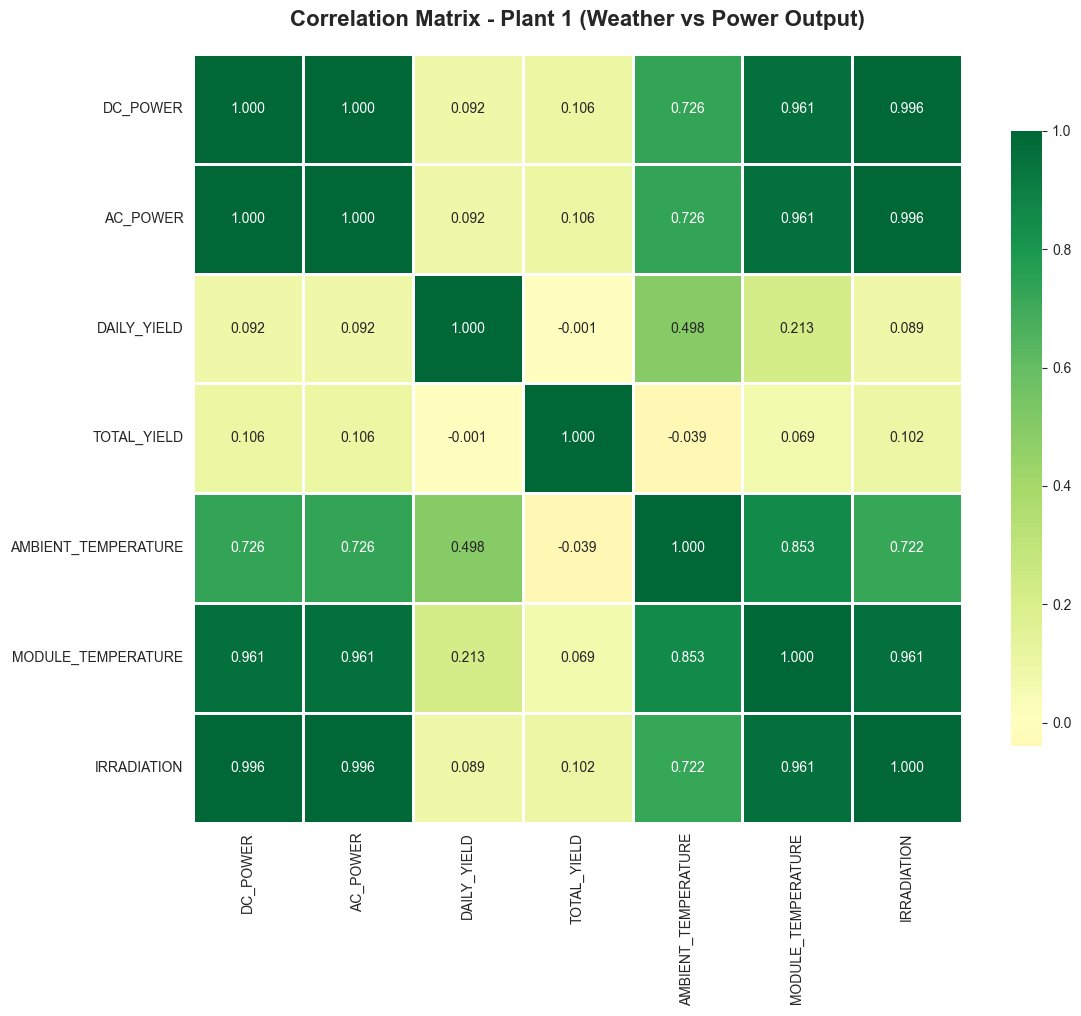


🎯 Correlations with AC_POWER (Target Variable):


AC_POWER              1.000
DC_POWER              1.000
IRRADIATION           0.996
MODULE_TEMPERATURE    0.961
AMBIENT_TEMPERATURE   0.726
TOTAL_YIELD           0.106
DAILY_YIELD           0.092
Name: AC_POWER, dtype: float64


💡 KEY INSIGHTS:
   • IRRADIATION → AC_POWER: 0.996
   • AMBIENT_TEMPERATURE → AC_POWER: 0.726
   • MODULE_TEMPERATURE → AC_POWER: 0.961
   • DC_POWER → AC_POWER: 1.000


In [ ]:
# Plant 1 Correlation Analysis
if 'df_p1_merged' in locals():
    print("="*80)
    print("PLANT 1 - CORRELATION ANALYSIS")
    print("="*80)
    
    # Select numeric columns for correlation (exclude DATE_TIME)
    numeric_cols = df_p1_merged.select_dtypes(include=[np.number]).columns
    
    # Calculate correlation matrix
    corr_matrix_p1 = df_p1_merged[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix_p1, annot=True, fmt='.3f', cmap='RdYlGn', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Plant 1 (Weather vs Power Output)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Show correlations with AC_POWER (target variable)
    print("\n🎯 Correlations with AC_POWER (Target Variable):")
    ac_power_corr = corr_matrix_p1['AC_POWER'].sort_values(ascending=False)
    display(ac_power_corr)
    
    print("\n💡 KEY INSIGHTS:")
    print(f"   • IRRADIATION → AC_POWER: {corr_matrix_p1.loc['IRRADIATION', 'AC_POWER']:.3f}")
    print(f"   • AMBIENT_TEMPERATURE → AC_POWER: {corr_matrix_p1.loc['AMBIENT_TEMPERATURE', 'AC_POWER']:.3f}")
    print(f"   • MODULE_TEMPERATURE → AC_POWER: {corr_matrix_p1.loc['MODULE_TEMPERATURE', 'AC_POWER']:.3f}")
    print(f"   • DC_POWER → AC_POWER: {corr_matrix_p1.loc['DC_POWER', 'AC_POWER']:.3f}")

## 7. Correlation Analysis - Plant 2

PLANT 2 - CORRELATION ANALYSIS


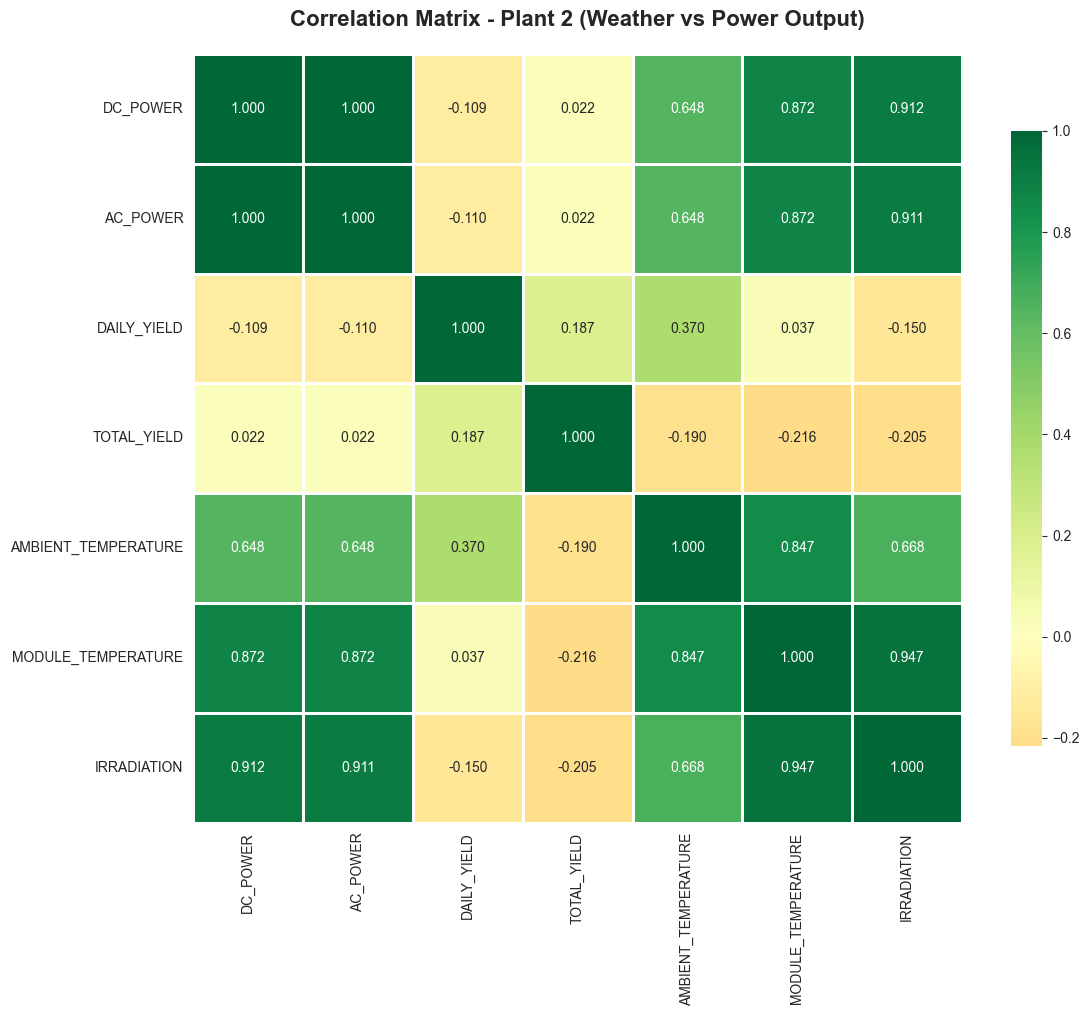


🎯 Correlations with AC_POWER (Target Variable):


AC_POWER               1.000
DC_POWER               1.000
IRRADIATION            0.911
MODULE_TEMPERATURE     0.872
AMBIENT_TEMPERATURE    0.648
TOTAL_YIELD            0.022
DAILY_YIELD           -0.110
Name: AC_POWER, dtype: float64


💡 KEY INSIGHTS:
   • IRRADIATION → AC_POWER: 0.911
   • AMBIENT_TEMPERATURE → AC_POWER: 0.648
   • MODULE_TEMPERATURE → AC_POWER: 0.872
   • DC_POWER → AC_POWER: 1.000


In [ ]:
# Plant 2 Correlation Analysis
if 'df_p2_merged' in locals():
    print("="*80)
    print("PLANT 2 - CORRELATION ANALYSIS")
    print("="*80)
    
    # Select numeric columns for correlation
    numeric_cols = df_p2_merged.select_dtypes(include=[np.number]).columns
    
    # Calculate correlation matrix
    corr_matrix_p2 = df_p2_merged[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix_p2, annot=True, fmt='.3f', cmap='RdYlGn', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Plant 2 (Weather vs Power Output)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Show correlations with AC_POWER (target variable)
    print("\n🎯 Correlations with AC_POWER (Target Variable):")
    ac_power_corr = corr_matrix_p2['AC_POWER'].sort_values(ascending=False)
    display(ac_power_corr)
    
    print("\n💡 KEY INSIGHTS:")
    print(f"   • IRRADIATION → AC_POWER: {corr_matrix_p2.loc['IRRADIATION', 'AC_POWER']:.3f}")
    print(f"   • AMBIENT_TEMPERATURE → AC_POWER: {corr_matrix_p2.loc['AMBIENT_TEMPERATURE', 'AC_POWER']:.3f}")
    print(f"   • MODULE_TEMPERATURE → AC_POWER: {corr_matrix_p2.loc['MODULE_TEMPERATURE', 'AC_POWER']:.3f}")
    print(f"   • DC_POWER → AC_POWER: {corr_matrix_p2.loc['DC_POWER', 'AC_POWER']:.3f}")

## 8. Visualization - Power Output vs Weather Conditions

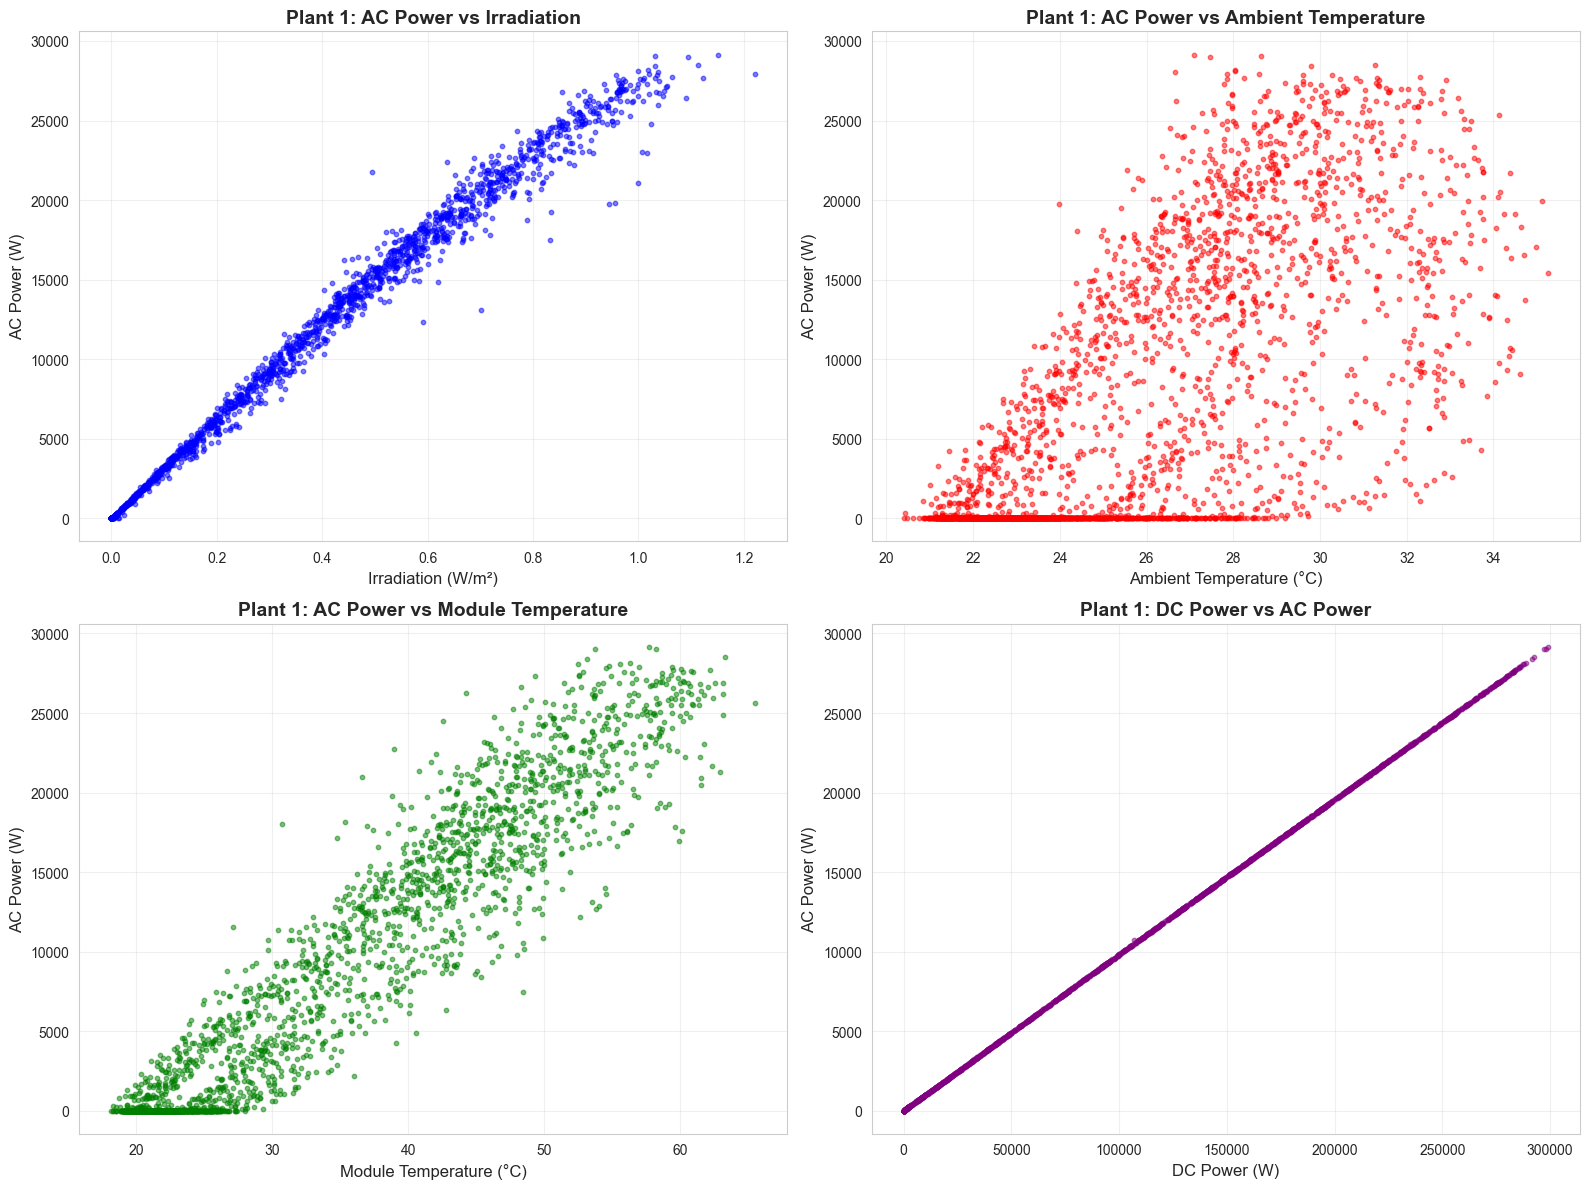

In [ ]:
# Plant 1 - Power vs Irradiation
if 'df_p1_merged' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # AC Power vs Irradiation
    axes[0, 0].scatter(df_p1_merged['IRRADIATION'], df_p1_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='blue')
    axes[0, 0].set_xlabel('Irradiation (W/m²)', fontsize=12)
    axes[0, 0].set_ylabel('AC Power (W)', fontsize=12)
    axes[0, 0].set_title('Plant 1: AC Power vs Irradiation', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # AC Power vs Ambient Temperature
    axes[0, 1].scatter(df_p1_merged['AMBIENT_TEMPERATURE'], df_p1_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='red')
    axes[0, 1].set_xlabel('Ambient Temperature (°C)', fontsize=12)
    axes[0, 1].set_ylabel('AC Power (W)', fontsize=12)
    axes[0, 1].set_title('Plant 1: AC Power vs Ambient Temperature', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # AC Power vs Module Temperature
    axes[1, 0].scatter(df_p1_merged['MODULE_TEMPERATURE'], df_p1_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='green')
    axes[1, 0].set_xlabel('Module Temperature (°C)', fontsize=12)
    axes[1, 0].set_ylabel('AC Power (W)', fontsize=12)
    axes[1, 0].set_title('Plant 1: AC Power vs Module Temperature', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # DC Power vs AC Power
    axes[1, 1].scatter(df_p1_merged['DC_POWER'], df_p1_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='purple')
    axes[1, 1].set_xlabel('DC Power (W)', fontsize=12)
    axes[1, 1].set_ylabel('AC Power (W)', fontsize=12)
    axes[1, 1].set_title('Plant 1: DC Power vs AC Power', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

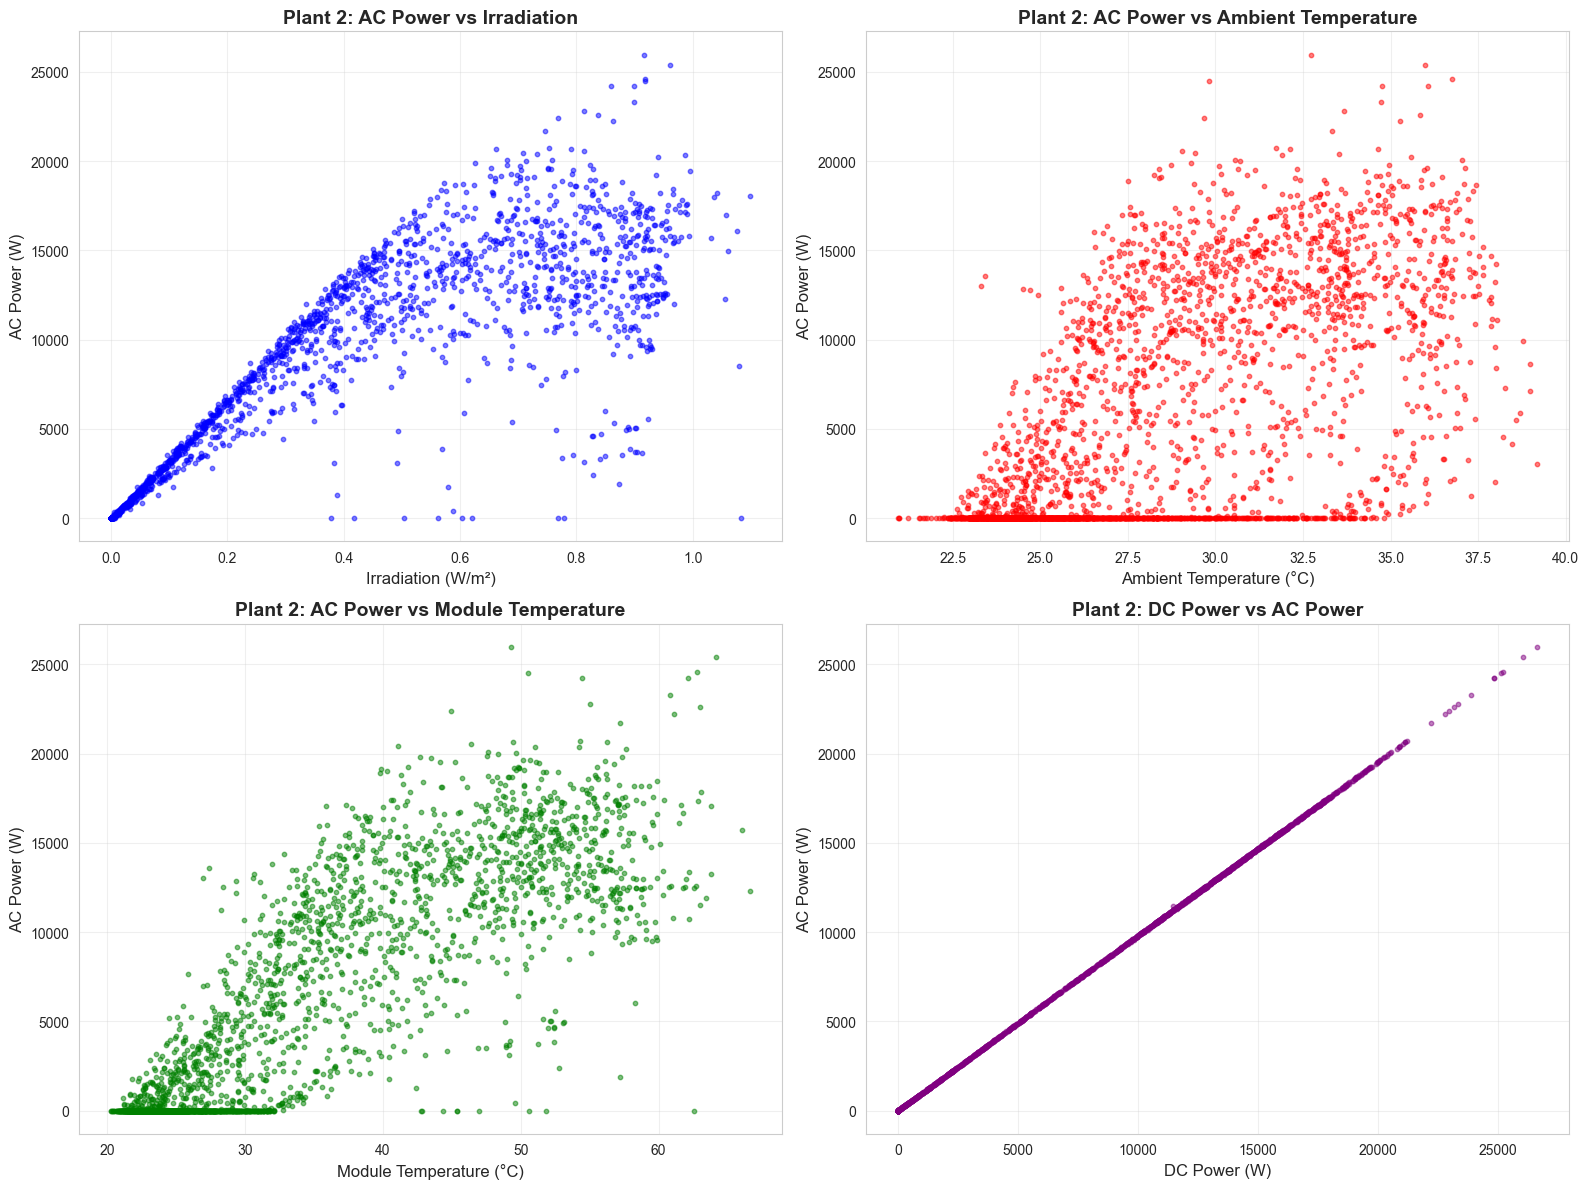

In [ ]:
# Plant 2 - Power vs Weather Conditions
if 'df_p2_merged' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # AC Power vs Irradiation
    axes[0, 0].scatter(df_p2_merged['IRRADIATION'], df_p2_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='blue')
    axes[0, 0].set_xlabel('Irradiation (W/m²)', fontsize=12)
    axes[0, 0].set_ylabel('AC Power (W)', fontsize=12)
    axes[0, 0].set_title('Plant 2: AC Power vs Irradiation', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # AC Power vs Ambient Temperature
    axes[0, 1].scatter(df_p2_merged['AMBIENT_TEMPERATURE'], df_p2_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='red')
    axes[0, 1].set_xlabel('Ambient Temperature (°C)', fontsize=12)
    axes[0, 1].set_ylabel('AC Power (W)', fontsize=12)
    axes[0, 1].set_title('Plant 2: AC Power vs Ambient Temperature', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # AC Power vs Module Temperature
    axes[1, 0].scatter(df_p2_merged['MODULE_TEMPERATURE'], df_p2_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='green')
    axes[1, 0].set_xlabel('Module Temperature (°C)', fontsize=12)
    axes[1, 0].set_ylabel('AC Power (W)', fontsize=12)
    axes[1, 0].set_title('Plant 2: AC Power vs Module Temperature', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # DC Power vs AC Power
    axes[1, 1].scatter(df_p2_merged['DC_POWER'], df_p2_merged['AC_POWER'], 
                       alpha=0.5, s=10, c='purple')
    axes[1, 1].set_xlabel('DC Power (W)', fontsize=12)
    axes[1, 1].set_ylabel('AC Power (W)', fontsize=12)
    axes[1, 1].set_title('Plant 2: DC Power vs AC Power', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Time-Series Visualization (For Context Only)

While we treat this as steady-state estimation, visualizing temporal patterns helps understand data characteristics.

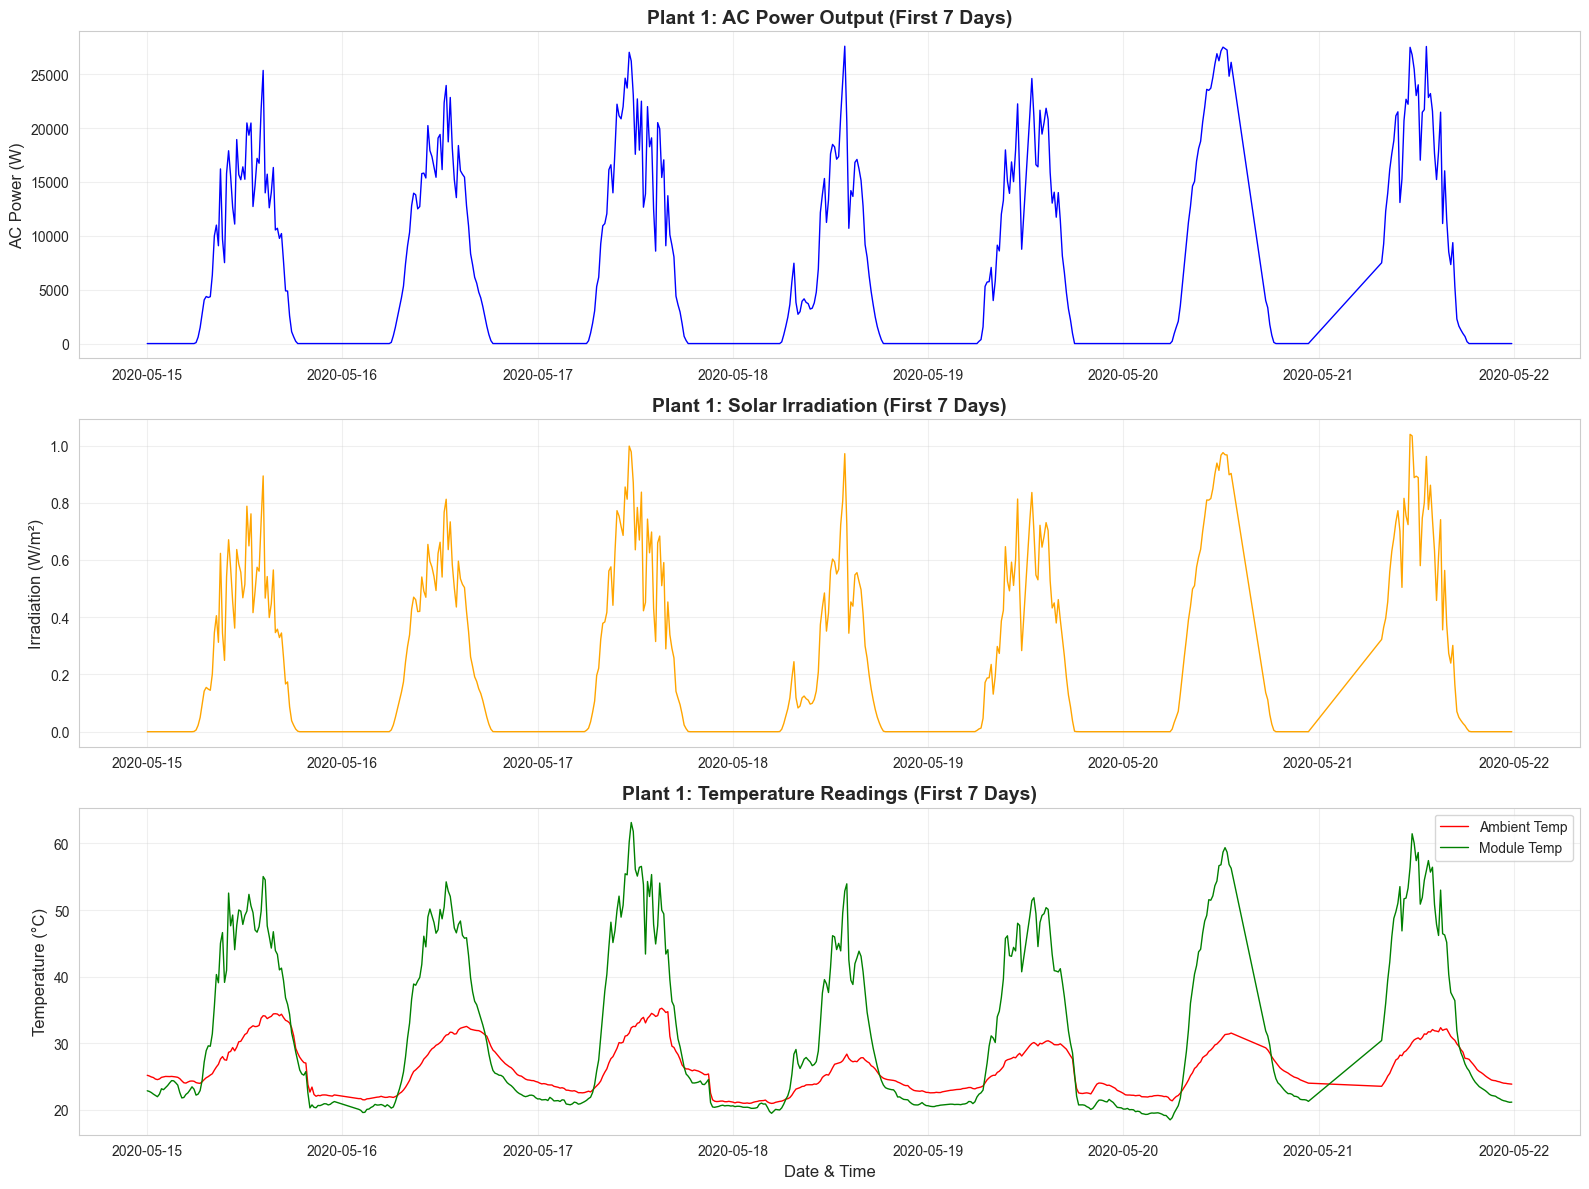

In [ ]:
# Plant 1 - Time Series Overview (First 7 days)
if 'df_p1_merged' in locals():
    # Filter first week for clarity
    df_p1_week = df_p1_merged[df_p1_merged['DATE_TIME'] < df_p1_merged['DATE_TIME'].min() + pd.Timedelta(days=7)]
    
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    
    # AC Power over time
    axes[0].plot(df_p1_week['DATE_TIME'], df_p1_week['AC_POWER'], color='blue', linewidth=1)
    axes[0].set_ylabel('AC Power (W)', fontsize=12)
    axes[0].set_title('Plant 1: AC Power Output (First 7 Days)', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Irradiation over time
    axes[1].plot(df_p1_week['DATE_TIME'], df_p1_week['IRRADIATION'], color='orange', linewidth=1)
    axes[1].set_ylabel('Irradiation (W/m²)', fontsize=12)
    axes[1].set_title('Plant 1: Solar Irradiation (First 7 Days)', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Temperature over time
    axes[2].plot(df_p1_week['DATE_TIME'], df_p1_week['AMBIENT_TEMPERATURE'], 
                 color='red', linewidth=1, label='Ambient Temp')
    axes[2].plot(df_p1_week['DATE_TIME'], df_p1_week['MODULE_TEMPERATURE'], 
                 color='green', linewidth=1, label='Module Temp')
    axes[2].set_xlabel('Date & Time', fontsize=12)
    axes[2].set_ylabel('Temperature (°C)', fontsize=12)
    axes[2].set_title('Plant 1: Temperature Readings (First 7 Days)', fontsize=14, fontweight='bold')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 10. Distribution Analysis

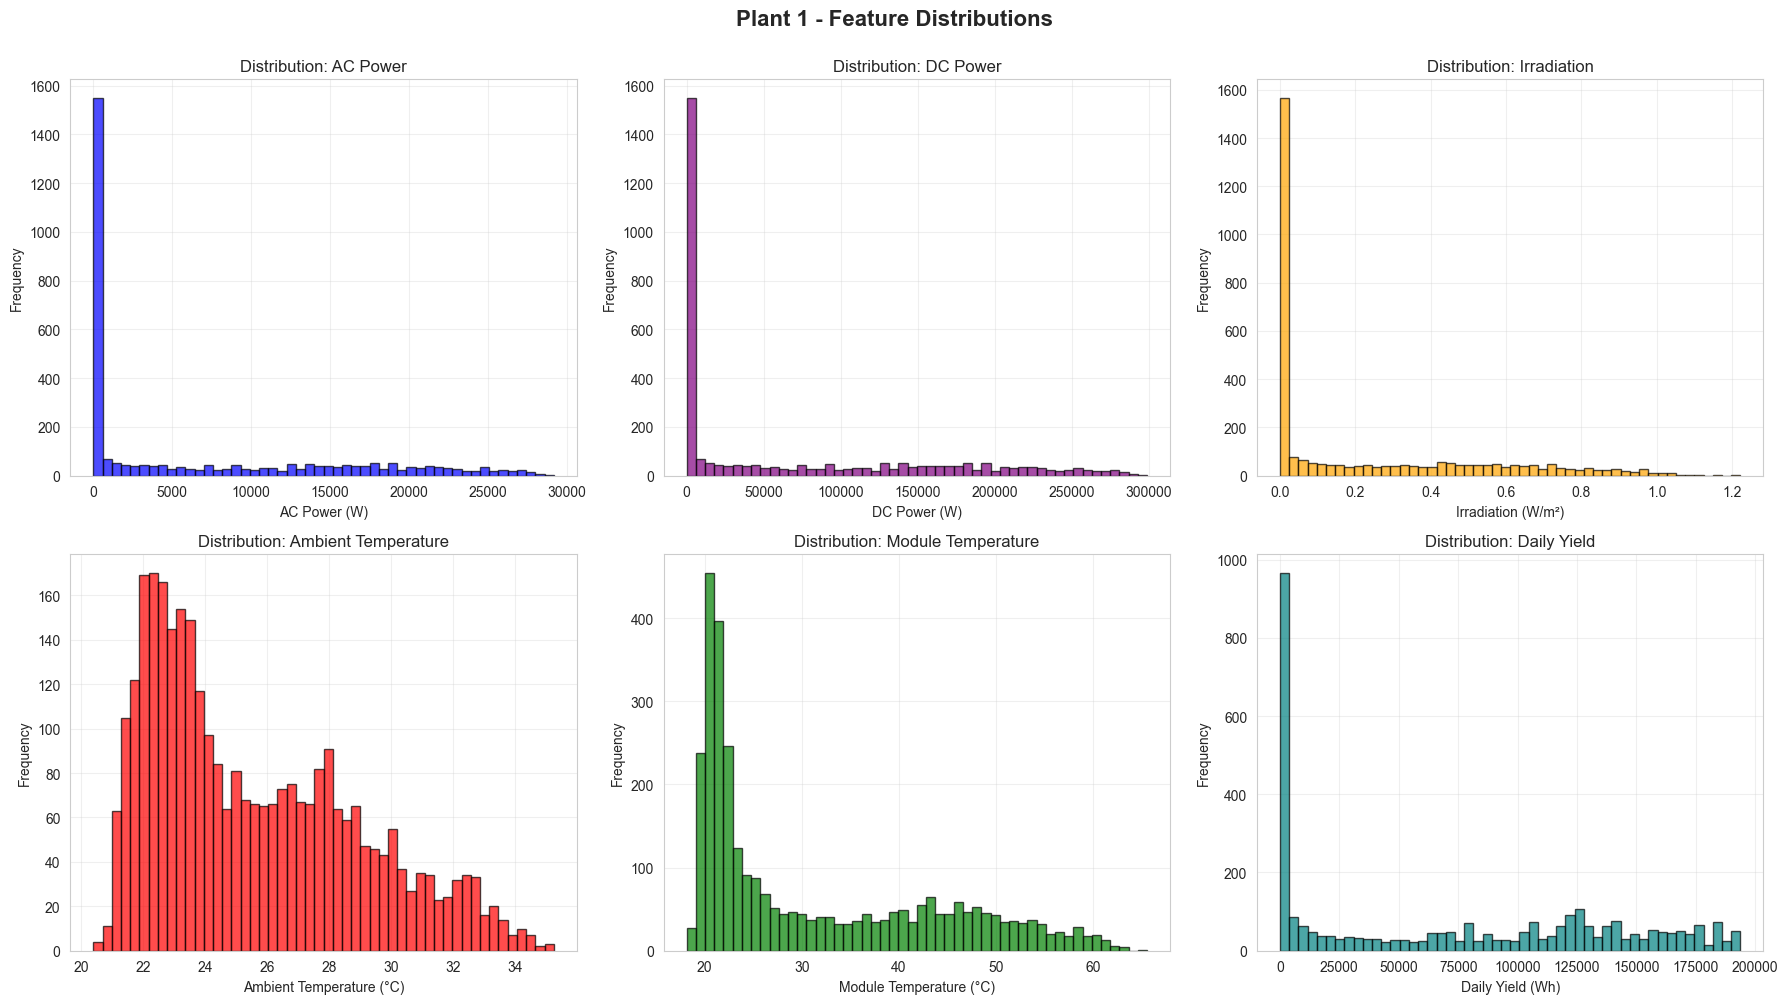

In [ ]:
# Distribution plots for Plant 1
if 'df_p1_merged' in locals():
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # AC Power
    axes[0, 0].hist(df_p1_merged['AC_POWER'], bins=50, color='blue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('AC Power (W)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution: AC Power')
    axes[0, 0].grid(True, alpha=0.3)
    
    # DC Power
    axes[0, 1].hist(df_p1_merged['DC_POWER'], bins=50, color='purple', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('DC Power (W)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution: DC Power')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Irradiation
    axes[0, 2].hist(df_p1_merged['IRRADIATION'], bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[0, 2].set_xlabel('Irradiation (W/m²)')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Distribution: Irradiation')
    axes[0, 2].grid(True, alpha=0.3)
    
    # Ambient Temperature
    axes[1, 0].hist(df_p1_merged['AMBIENT_TEMPERATURE'], bins=50, color='red', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Ambient Temperature (°C)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution: Ambient Temperature')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Module Temperature
    axes[1, 1].hist(df_p1_merged['MODULE_TEMPERATURE'], bins=50, color='green', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Module Temperature (°C)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution: Module Temperature')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Daily Yield
    axes[1, 2].hist(df_p1_merged['DAILY_YIELD'], bins=50, color='teal', alpha=0.7, edgecolor='black')
    axes[1, 2].set_xlabel('Daily Yield (Wh)')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].set_title('Distribution: Daily Yield')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.suptitle('Plant 1 - Feature Distributions', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

## 11. Summary and ML Algorithm Recommendations

In [ ]:
print("="*90)
print("SUMMARY & MACHINE LEARNING ALGORITHM RECOMMENDATIONS")
print("="*90)

if 'df_p1_merged' in locals() and 'df_p2_merged' in locals():
    print("\n📊 DATASETS ANALYZED:")
    print("-"*90)
    print(f"✅ Plant 1 Merged Data: {df_p1_merged.shape[0]:,} samples × {df_p1_merged.shape[1]} features")
    print(f"✅ Plant 2 Merged Data: {df_p2_merged.shape[0]:,} samples × {df_p2_merged.shape[1]} features")
    
    print("\n\n🎯 PROBLEM FORMULATION: Steady-State Estimation")
    print("-"*90)
    print("Objective: Predict instantaneous AC power from instantaneous weather conditions")
    print("Mathematical Model: AC_POWER(t) = f(IRRADIATION(t), TEMP_AMBIENT(t), TEMP_MODULE(t))")
    print("\nThis is NOT time-series forecasting. We map current weather → current power.")
    
    print("\n\n🧠 SUITABLE ML ALGORITHMS:")
    print("-"*90)
    print("\n1️⃣  LINEAR REGRESSION")
    print("   Purpose: Baseline model for AC power prediction")
    print("   Features: IRRADIATION, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE")
    print("   Target: AC_POWER")
    print("   Justification: Simple, interpretable, matches course material")
    
    print("\n2️⃣  POLYNOMIAL REGRESSION")
    print("   Purpose: Capture non-linear relationships (temperature effects)")
    print("   Features: Polynomial features (degree 2-3) of weather variables")
    print("   Target: AC_POWER")
    print("   Justification: Solar panels have non-linear efficiency curves")
    
    print("\n3️⃣  DECISION TREES / RANDOM FOREST")
    print("   Purpose: Handle feature interactions without manual engineering")
    print("   Features: All weather + DC_POWER")
    print("   Target: AC_POWER")
    print("   Justification: Can model complex decision boundaries")
    
    print("\n4️⃣  NEURAL NETWORKS (PyTorch)")
    print("   Purpose: Deep learning approach for power estimation")
    print("   Architecture: Input(3) → Hidden(64) → Hidden(32) → Output(1)")
    print("   Features: IRRADIATION, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE")
    print("   Target: AC_POWER")
    print("   Justification: Demonstrates modern AI techniques")
    
    print("\n5️⃣  K-MEANS CLUSTERING")
    print("   Purpose: Identify operational patterns (night/day/peak)")
    print("   Features: AC_POWER, IRRADIATION, TEMPERATURE")
    print("   Clusters: 3-5 (e.g., Night, Low-Sun, High-Sun, Peak)")
    print("   Justification: Unsupervised learning component")
    
    print("\n6️⃣  LOGISTIC REGRESSION (Classification)")
    print("   Purpose: Binary classification (High/Low power output)")
    print("   Features: Weather conditions")
    print("   Target: Power category (High = above median, Low = below median)")
    print("   Justification: Demonstrates classification capability")
    
    print("\n\n📈 EVALUATION METRICS:")
    print("-"*90)
    print("Regression Models: MSE, RMSE, MAE, R²")
    print("Classification Models: Accuracy, Precision, Recall, F1-Score")
    print("Clustering: Silhouette Score, Inertia")
    
    print("\n\n💡 KEY INSIGHTS FROM EDA:")
    print("-"*90)
    if 'corr_matrix_p1' in locals():
        print(f"• IRRADIATION is strongly correlated with AC_POWER (r = {corr_matrix_p1.loc['IRRADIATION', 'AC_POWER']:.3f})")
    print("• Temperature has moderate correlation with power output")
    print("• DC_POWER and AC_POWER are highly correlated (inverter efficiency)")
    print("• Data is clean with no missing values")
    print("• Both plants have similar patterns, allowing model validation")
    
    print("\n\n✅ NEXT STEPS:")
    print("-"*90)
    print("1. Create preprocessing pipeline (scaling, train-test split)")
    print("2. Implement Linear Regression baseline")
    print("3. Implement Polynomial Regression")
    print("4. Implement Decision Trees/Random Forest")
    print("5. Implement Neural Network (PyTorch)")
    print("6. Implement K-Means Clustering")
    print("7. Create classification labels and train Logistic Regression")
    print("8. Compare all models and generate final report")
    
    print("\n" + "="*90)
    print("EDA COMPLETE - Ready for Model Development!")
    print("="*90)

else:
    print("⚠️ Merged datasets not available. Please run previous cells.")

SUMMARY & MACHINE LEARNING ALGORITHM RECOMMENDATIONS

📊 DATASETS ANALYZED:
------------------------------------------------------------------------------------------
✅ Plant 1 Merged Data: 3,157 samples × 8 features
✅ Plant 2 Merged Data: 3,259 samples × 8 features


🎯 PROBLEM FORMULATION: Steady-State Estimation
------------------------------------------------------------------------------------------
Objective: Predict instantaneous AC power from instantaneous weather conditions
Mathematical Model: AC_POWER(t) = f(IRRADIATION(t), TEMP_AMBIENT(t), TEMP_MODULE(t))

This is NOT time-series forecasting. We map current weather → current power.


🧠 SUITABLE ML ALGORITHMS:
------------------------------------------------------------------------------------------

1️⃣  LINEAR REGRESSION
   Purpose: Baseline model for AC power prediction
   Features: IRRADIATION, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE
   Target: AC_POWER
   Justification: Simple, interpretable, matches course material

2️⃣  

## 12. Save Processed Data for Model Training

In [ ]:
# Save merged datasets for use in subsequent notebooks
output_dir = Path('..') / 'datasets' / 'solar' / 'processed'
output_dir.mkdir(parents=True, exist_ok=True)

if 'df_p1_merged' in locals():
    output_path_p1 = output_dir / 'plant1_merged.csv'
    df_p1_merged.to_csv(output_path_p1, index=False)
    print(f"✅ Plant 1 merged data saved: {output_path_p1}")

if 'df_p2_merged' in locals():
    output_path_p2 = output_dir / 'plant2_merged.csv'
    df_p2_merged.to_csv(output_path_p2, index=False)
    print(f"✅ Plant 2 merged data saved: {output_path_p2}")

print("\n🎉 All processed datasets saved successfully!")

✅ Plant 1 merged data saved: ../datasets/solar/processed/plant1_merged.csv
✅ Plant 2 merged data saved: ../datasets/solar/processed/plant2_merged.csv

🎉 All processed datasets saved successfully!
